
Cleaning data using panda lib.
-done by Bara'a Al-Yateem

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

#importing all needed libraries to use thier features

In [2]:
#this is our dataset, called Employee Sample Data - A.
df= pd.read_excel(r"C:\Users\Family Laptop 1 DELL\Downloads\Employee Sample Data - A.xlsx")
#it is an excel file, we can either change it to a CSV [COMA SEPARATED VALUE] file and read it that way, or just read it as excel.

In [3]:
#A general look into the data, what are the types? The maximmum column and row numbers? Does the column accept null values?
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   EEID           1000 non-null   object        
 1   Full Name      998 non-null    object        
 2   Job Title      999 non-null    object        
 3   Department     998 non-null    object        
 4   Business Unit  1000 non-null   object        
 5   Gender         999 non-null    object        
 6   Ethnicity      993 non-null    object        
 7   Age            994 non-null    float64       
 8   Hire Date      993 non-null    datetime64[ns]
 9   Annual Salary  989 non-null    float64       
 10  Bonus %        992 non-null    float64       
 11  Country        998 non-null    object        
 12  City           998 non-null    object        
 13  Exit Date      85 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(3), object(9)
memory usage: 109.5+ KB
None


In [4]:
#B cleaning the data.
#B.0 Duplicates?
print(df.duplicated().to_string().count("True"))
#appears there is none. 

#B.1 Null cells where they shouln't be?
#preserve much of the rows that have data in the columns we actually need. so placeholders are used.

#Full Name:
#print(df[df["Full Name"].isna()==1].to_string()) #look at the null name series
df.fillna({"Full Name": "Unknown"}, inplace=True)

#Job Title:
df.fillna({"Job Title": "Unknown"}, inplace=True)

#Age,Bonus %,Hire Date:
#used other ways to fill beacause of the types. 
df.fillna({"Age": df["Age"].mean(), "Bonus %": df["Bonus %"].mode()[0]}, inplace=True)
df['Age']=df['Age'].round() # to keep all age values 2 digits. because of the mean

#B.2 Dropping rows?

#Department,Ethnicity,Annual Salary:
df.dropna( subset=["Department","Ethnicity", "Annual Salary"], inplace= True)

#reset the index and check on the data to make sure:
df = df.reset_index(drop=True)
print(df.info())

#cleaning done.

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   EEID           985 non-null    object        
 1   Full Name      985 non-null    object        
 2   Job Title      985 non-null    object        
 3   Department     985 non-null    object        
 4   Business Unit  985 non-null    object        
 5   Gender         985 non-null    object        
 6   Ethnicity      985 non-null    object        
 7   Age            985 non-null    float64       
 8   Hire Date      985 non-null    datetime64[ns]
 9   Annual Salary  985 non-null    float64       
 10  Bonus %        985 non-null    float64       
 11  Country        985 non-null    object        
 12  City           985 non-null    object        
 13  Exit Date      84 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(3), object(9)
memory usage: 107.9+ KB
None

In [5]:
#C Changing the first five rows with any value.
df.loc[:4, ['EEID','Full Name','Job Title','Department','Business Unit','Gender','Ethnicity','Age','Hire Date','Annual Salary','Bonus %','Country','City','Exit Date']] = [
    ['EE001', 'Harry Potter', 'Wizard', 'Disney', 'Magic Division', 'Male', 'Gryffindor', 17, '2010-07-31', 75000, .05, 'United Kingdom', 'London', '2018-05-15'],
    ['EE002', 'Frodo Baggins', 'Adventurer', 'Disney', 'Hobbits', 'Male', 'Hobbit', 50, '2012-03-12', 53000, .03, 'Middle-earth', 'Shire', '2019-04-01'],
    ['EE003', 'Tony Stark', 'Engineer', 'Disney', 'Stark Industries', 'Male', 'Human', 45, '2008-11-20', 120000, .07, 'United States', 'Los Angeles', '2015-12-10'],
    ['EE004', 'Simba', 'King', 'Disney', 'Savanna', 'Male', 'Lion', 8, '2011-09-05', 95000, .04, 'Savanah', 'The wild', '2019-06-21'],
    ['EE005', 'Neytiri', 'Warrior', 'Disney', 'The floating islands', 'Female', 'Na\'vi', 28, '2013-02-14', 68000, .06, 'Pandora', 'Hometree', '']
]
print(df.head(5)) #check the data.

    EEID      Full Name   Job Title Department         Business Unit  Gender  \
0  EE001   Harry Potter      Wizard     Disney        Magic Division    Male   
1  EE002  Frodo Baggins  Adventurer     Disney               Hobbits    Male   
2  EE003     Tony Stark    Engineer     Disney      Stark Industries    Male   
3  EE004          Simba        King     Disney               Savanna    Male   
4  EE005        Neytiri     Warrior     Disney  The floating islands  Female   

    Ethnicity   Age  Hire Date  Annual Salary  Bonus %         Country  \
0  Gryffindor  17.0 2010-07-31        75000.0     0.05  United Kingdom   
1      Hobbit  50.0 2012-03-12        53000.0     0.03    Middle-earth   
2       Human  45.0 2008-11-20       120000.0     0.07   United States   
3        Lion   8.0 2011-09-05        95000.0     0.04         Savanah   
4       Na'vi  28.0 2013-02-14        68000.0     0.06         Pandora   

          City  Exit Date  
0       London 2018-05-15  
1        Shire 201

In [6]:
#D Print the row with the largest salary.
#find the largest salary
Max_Sal_Row = df[df["Annual Salary"]==df['Annual Salary'].max()]
print(Max_Sal_Row) #check the result

       EEID     Full Name       Job Title Department  Business Unit  Gender  \
974  E04354  Raelynn Rios  Vice President      Sales  Manufacturing  Female   

    Ethnicity   Age  Hire Date  Annual Salary  Bonus %        Country  \
974    Latino  43.0 2016-08-21       258498.0     0.35  United States   

         City Exit Date  
974  Columbus       NaT  


In [7]:
#E Group by department, and get the average age as well as average salary.
avg_age_sal_by_dep= df.groupby('Department')[['Age','Annual Salary']].mean().reset_index().rename(columns ={'Age':'Avg Age','Annual Salary': 'Avg Annsal'})
print(avg_age_sal_by_dep) #check the result

        Department    Avg Age     Avg Annsal
0       Accounting  43.656250  123146.947917
1           Disney  29.600000   82200.000000
2      Engineering  45.941558  109377.415584
3          Finance  44.904348  123346.486957
4  Human Resources  44.327869  118256.926230
5               IT  44.358974   97820.388889
6        Marketing  43.216667  129663.033333
7            Sales  43.604317  111225.338129


In [8]:
#F Group by department+ethnicity, and find the maximum age, minimum age, and median salary.
agg_by_dep_eth = df.groupby(['Department', 'Ethnicity']).agg({'Age': ['max', 'min'],'Annual Salary': 'median'}).reset_index()
agg_by_dep_eth.columns = ['Department', 'Ethnicity', 'Max Age', 'Min Age', 'Avg Annsal'] #renaming multiple columns.
print(agg_by_dep_eth)

         Department   Ethnicity  Max Age  Min Age  Avg Annsal
0        Accounting       Asian     64.0     25.0    114893.0
1        Accounting       Black     51.0     30.0     91853.0
2        Accounting   Caucasian     62.0     26.0    121159.5
3        Accounting      Latino     62.0     26.0     92317.0
4            Disney  Gryffindor     17.0     17.0     75000.0
5            Disney      Hobbit     50.0     50.0     53000.0
6            Disney       Human     45.0     45.0    120000.0
7            Disney        Lion      8.0      8.0     95000.0
8            Disney       Na'vi     28.0     28.0     68000.0
9       Engineering       Asian     65.0     25.0     91230.0
10      Engineering       Black     56.0     27.0     74412.0
11      Engineering   Caucasian     64.0     25.0     91621.0
12      Engineering      Latino     64.0     27.0     96818.0
13          Finance       Asian     64.0     25.0    125329.0
14          Finance       Black     65.0     25.0    131652.0
15      

In [9]:
#G Save your work in a new Excel file 

#change the date format to look like original without additions.
df['Hire Date'] = df['Hire Date'].dt.strftime('%m/%d/%Y')
df['Exit Date'] = df['Exit Date'].dt.strftime('%m/%d/%Y')

#send to excel.
with pd.ExcelWriter('Project_Results.xlsx') as writer:
    df.to_excel(writer, sheet_name='1-2 Clean_Data', index=False)
    Max_Sal_Row.to_excel(writer, sheet_name='3 Max_Salary', index=False)
    avg_age_sal_by_dep.to_excel(writer, sheet_name='4 Dept_Avg_Age_Salary', index=False)
    agg_by_dep_eth.to_excel(writer, sheet_name='5 Dept_Ethnicity_MaxMinMedian', index=False)

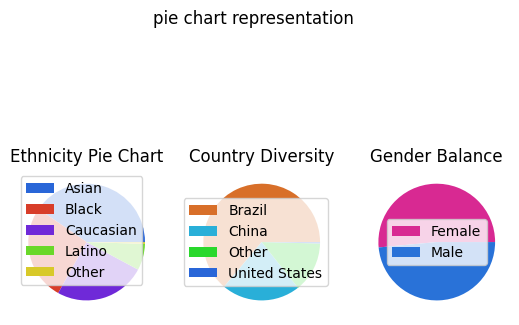

In [10]:
#graphing portion:

#[Pie Charts]
#GRAPH #1.1:Ethnicity 
#Shows the proportion of employees by ethnicity

percentages= df['Ethnicity'].value_counts().reset_index()
colors_ethnicity = ["#2966d8", "#d83d29","#6f29d8" , "#69d829", "#d8c929"]
other1=0
for i in percentages.index:
  if percentages.loc[i, "count"]<=1:
    percentages.drop(i, inplace = True)
    other1+=1
addition1= pd.DataFrame({'Ethnicity': ['Other'], 'count': [other1]})
percentages = pd.concat([percentages, addition1], ignore_index=True)
plt.subplot(1,3,1)
pieplt1=plt.pie(percentages['count'], colors= colors_ethnicity)
plt.legend(percentages['Ethnicity'].sort_values())
plt.title('Ethnicity Pie Chart')

#GRAPH #1.2:Country diversity
#shows the country diversity between employees.

country_count = df['Country'].value_counts().reset_index()
colors_country = ["#d86f29","#29afd8", "#29d82c", "#2966d8" , "#d8d229"]
other2=0
for i in country_count.index:
  if country_count.loc[i, "count"]<=1:
    country_count.drop(i, inplace = True)
    other2+=1
addition2 = pd.DataFrame({'Country': ['Other'], 'count': [other2]})
country_count = pd.concat([country_count, addition2], ignore_index=True)
plt.subplot(1,3,2)
pieplt2=plt.pie(country_count['count'], colors= colors_country)
plt.legend(country_count['Country'].sort_values())
plt.title('Country Diversity')

#GRAPH #1.3:  Male to Female Ratio of Employees 
#Show gender balance between employees.

gender_count = df['Gender'].value_counts().reset_index()
colors_gender = ["#d82992", "#2972d8"]
plt.subplot(1,3,3)
pieplt3=plt.pie(gender_count['count'], colors= colors_gender)
plt.legend(gender_count['Gender'].sort_values())
plt.title('Gender Balance')

plt.suptitle("pie chart representation")
plt.show()


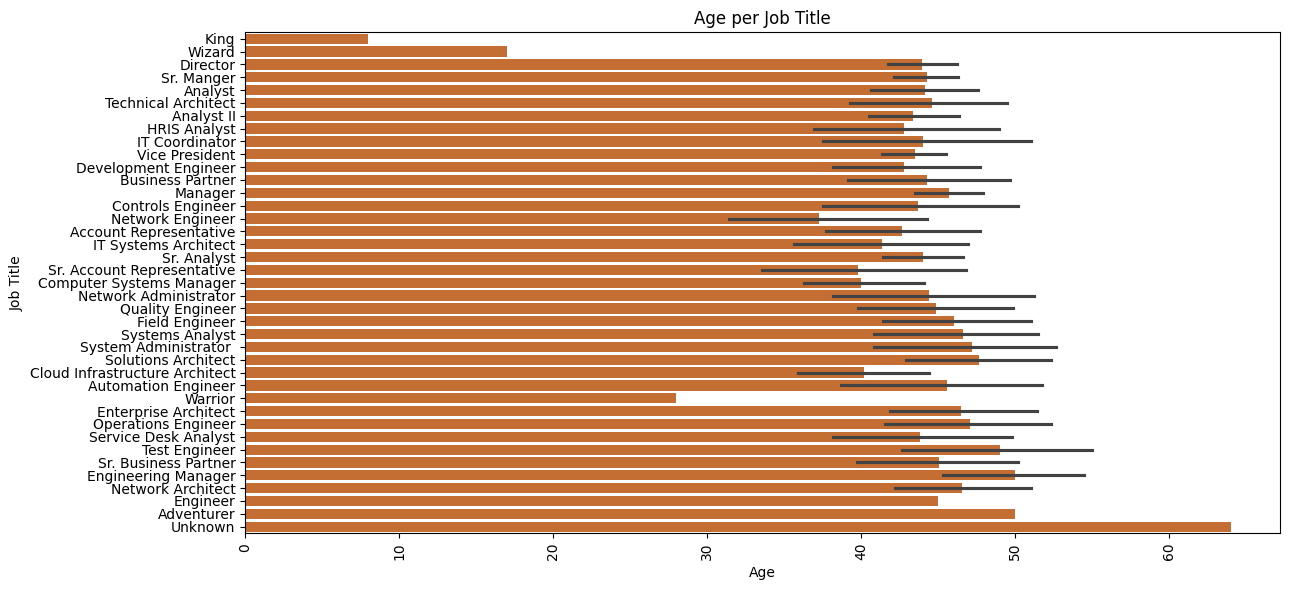

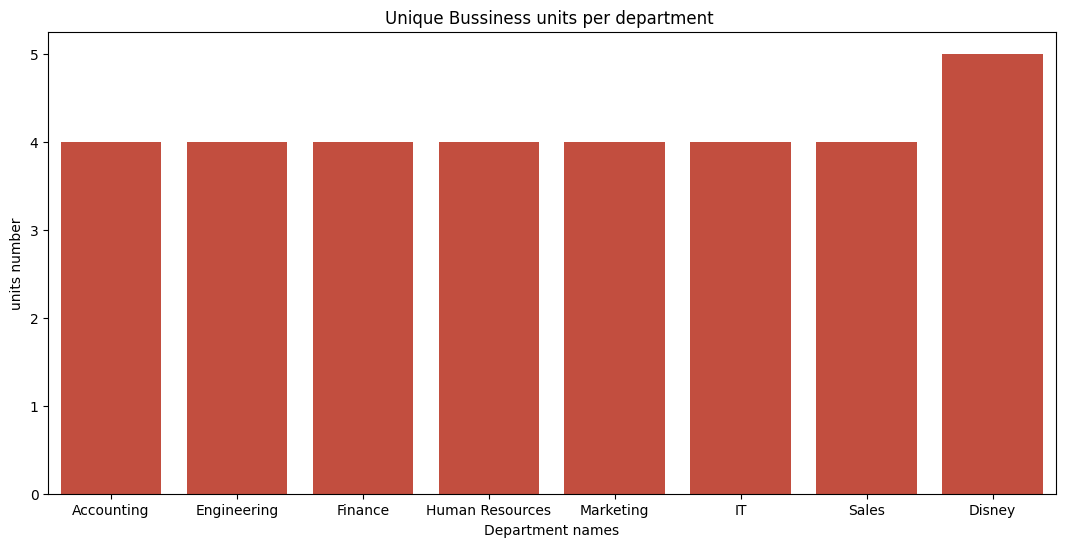

In [11]:
#[Barplot]
#GRAPH #2.1:Age distribution in Each Job 
#Shows the age distribution per job title 

plt.figure(figsize=(13, 6))
category_order = df.sort_values('Age')['Job Title']
barplt1=sns.barplot(x='Age', y='Job Title', data=df, orient='h', order=category_order, color= "#dc691c")
plt.xticks(rotation=90)
plt.title('Age per Job Title')
plt.ylabel('Job Title')
plt.xlabel('Age')
plt.tight_layout()

#GRAPH #2.2:Number of Departments per Business Unit
# more Business Units within a department can mean more complexity or opportunities.

plt.figure(figsize=(13, 6))
dep_unit_count=df.groupby('Department')['Business Unit'].nunique().reset_index().sort_values(by='Business Unit')
dep_unit_count.columns=['Department','unique number of units']
#print(dep_unit_count)
barplt2= sns.barplot(x= 'Department', y='unique number of units' , data=dep_unit_count, color='#d83d29')
plt.title('Unique Bussiness units per department ')
plt.xlabel('Department names')
plt.ylabel('units number')
plt.show()

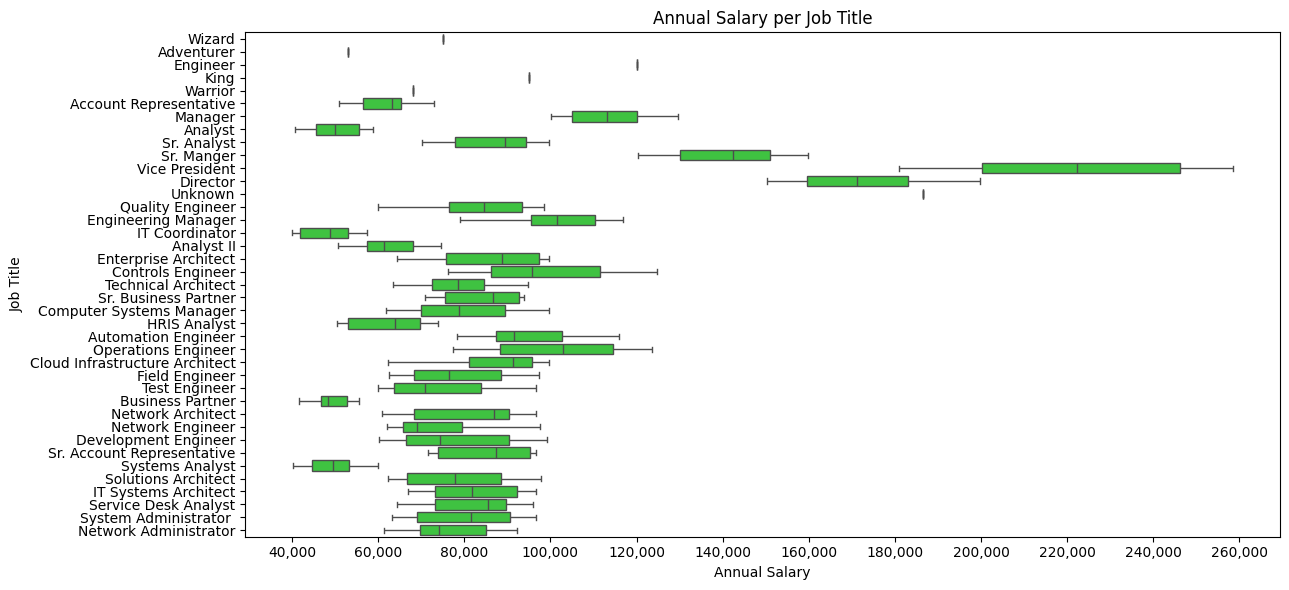

In [12]:
#[Boxplot]
#GRAPH #3:Annual Salary dirtribution for Each Job
#Display the Annual salary spread per job

plt.figure(figsize=(13, 6))
boxplt1=sns.boxplot(x='Annual Salary', y='Job Title', data=df ,color= "#29d82c" )
boxplt1.xaxis.set_major_locator(ticker.MultipleLocator(20000))
boxplt1.xaxis.set_major_formatter('{x:,.0f}')  #thousands separator, no decimals
plt.title('Annual Salary per Job Title')
plt.ylabel('Job Title')
plt.xlabel('Annual Salary')
plt.tight_layout()

Text(0.5, 0, 'Annual Salary')

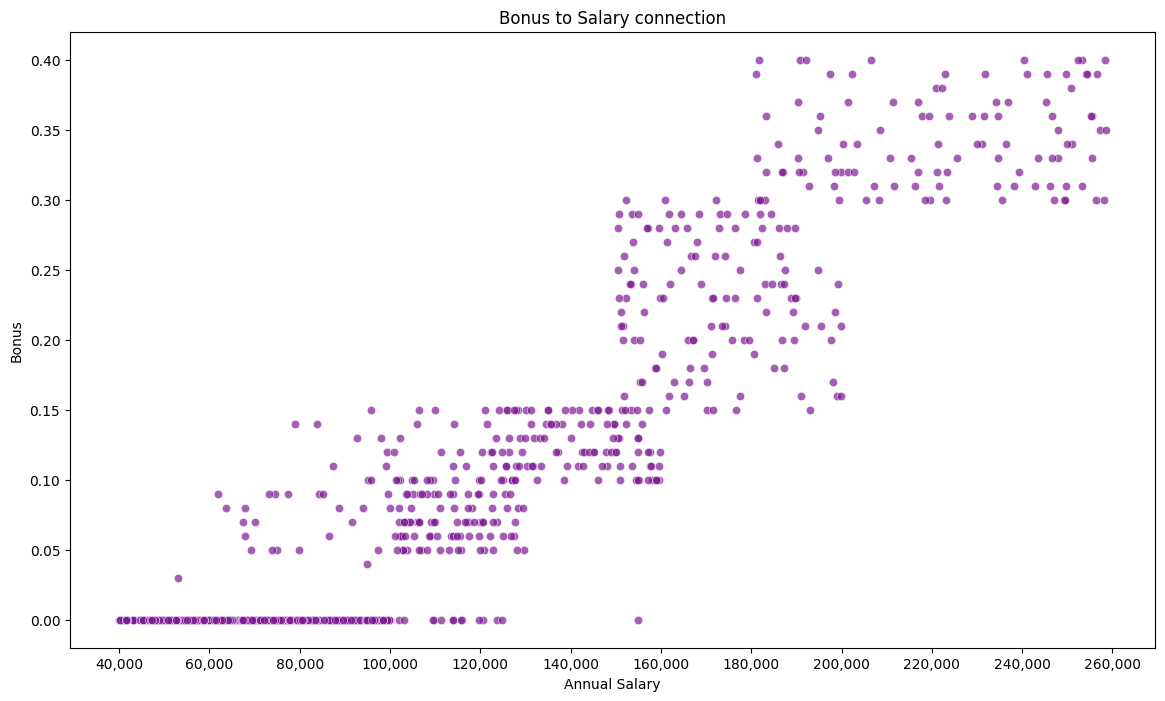

In [13]:
#[scatter Plot]
#GRAPH #5:Bonus and Salary Connection 
#Show the relationship between bonus and salary
plt.figure(figsize=(14, 8))
scatplt=sns.scatterplot(x='Annual Salary',y='Bonus %', data=df, c= "#7e1a94",alpha=0.7,sizes= 2)
scatplt.xaxis.set_major_locator(ticker.MultipleLocator(20000))
scatplt.xaxis.set_major_formatter('{x:,.0f}')  
plt.title('Bonus to Salary connection')
plt.ylabel('Bonus')
plt.xlabel('Annual Salary')

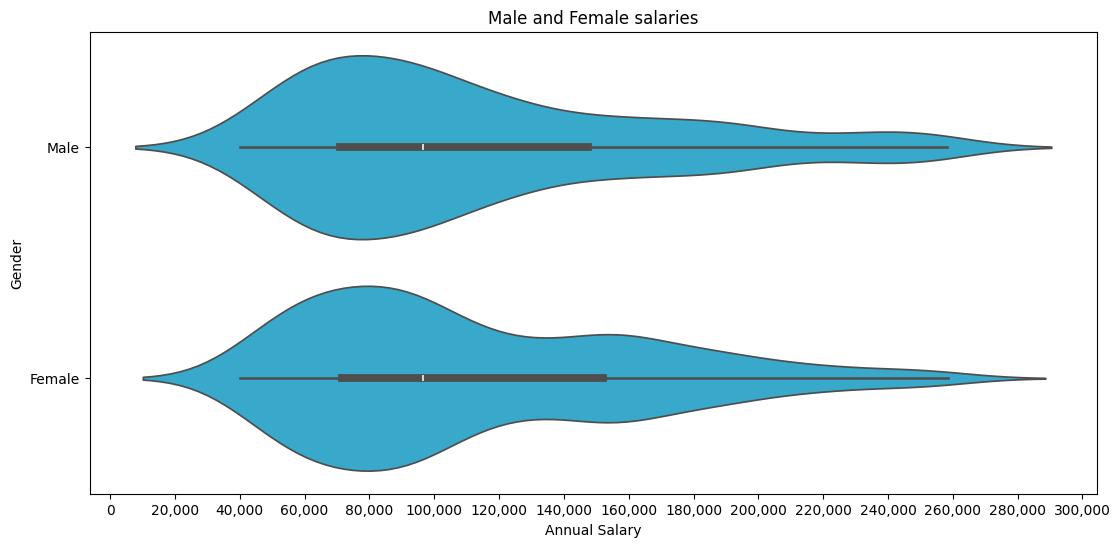

In [14]:
#[Violin Plot]
#GRAPH #6:Comparision between Male and Female salaries
#shows the difference in salaries between makes and females
plt.figure(figsize=(13, 6))
violinplt=sns.violinplot(x= 'Annual Salary', y='Gender', data= df ,color="#1fb6e4")
violinplt.xaxis.set_major_locator(ticker.MultipleLocator(20000))
violinplt.xaxis.set_major_formatter('{x:,.0f}')  
plt.title('Male and Female salaries')
plt.ylabel('Gender')
plt.xlabel('Annual Salary')
plt.show()
#----------------